In [ ]:
import numpy as np

In [ ]:
image=np.random.randint(1, 10, (5, 5))
print(image)

[[7 4 4 7 1]
 [9 6 7 3 6]
 [8 9 2 3 3]
 [4 1 6 4 4]
 [5 1 3 5 5]]


In [ ]:
p=np.asarray([[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0]], dtype=object)
p

array([list([0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0]),
       list([0, 0, 0, 0, 0, 0, 0, 0, 0]),
       list([0, 0, 0, 0, 0, 0, 0, 0, 0])], dtype=object)

In [ ]:
# Projection 1
for i in range(5):
  for j in range(5):
    p[0][i]=p[0][i]+image[j][i]

# Projection 2
for i in range(5):
  p[1][i]=sum(image[4-i])

# Projection 3
for i in range(9):
  p[2][i]=sum(np.fliplr(image).diagonal(i-4))

# Projection 4
for i in range(9):
  p[3][i]=sum(image.diagonal(4-i))

In [ ]:
p

array([list([33, 21, 22, 22, 19]), list([19, 19, 25, 31, 23]),
       list([5, 9, 10, 16, 12, 27, 18, 13, 7]),
       list([1, 13, 10, 18, 24, 29, 12, 5, 5])], dtype=object)

# **Linear Algebra**

In [ ]:
A = np.zeros((25,25), dtype=int)

In [ ]:
# Equations 

# A[0] to A[4]
for i in range(5):
  A[i][[i,i+5,i+10,i+15,i+20]]=1

# A[5] to A[9]
for i in range(5):
  A[i+5][[(4-i)*5,(4-i)*5+1,(4-i)*5+2,(4-i)*5+3,(4-i)*5+4]]=1

A[10][24]=1                   #A10
A[11][[19,23]]=1              #A11
A[12][[14,18,22]]=1           #A12
A[13][[9,13,17,21]]=1         #A13
A[14][[4,8,12,16,20]]=1       #A14
A[15][[3,7,11,15]]=1          #A15
A[16][[2,6,10]]=1             #A16
A[17][[5,1]]=1                #A17
# A[17][0]=1                  #A18

# A[18][4]=1                  #A19
A[18][[3,9]]=1                #A20
A[19][[2,8,14]]=1             #A21
A[20][[1,7,13,19]]=1          #A22
A[21][[0,6,12,18,24]]=1       #A23
A[22][[5,11,17,23]]=1         #A24
A[23][[10,16,22]]=1           #A25
A[24][[15,21]]=1              #A26
# A[24][20]=1                 #A27

In [ ]:
A

array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      

In [ ]:
# Projections Values
for i in range(len(p)):
  print(p[i])

[33, 21, 22, 22, 19]
[19, 19, 25, 31, 23]
[5, 9, 10, 16, 12, 27, 18, 13, 7]
[1, 13, 10, 18, 24, 29, 12, 5, 5]


In [ ]:
B=np.concatenate((p[0], p[1],p[2],p[3]))
B=np.delete(B, [18,19,27])

In [ ]:
import time
start_time = time.time()

X = np.linalg.lstsq(A, B, rcond=None)

print("Solved [ %s seconds ]" % (time.time() - start_time))

Solved [ 0.019121646881103516 seconds ]


In [ ]:
output_linear=X[0].reshape(5,5)
output_linear

array([[7. , 3.8, 4.3, 6.9, 1. ],
       [9.2, 6.5, 6.9, 2.3, 6.1],
       [7.2, 8.6, 2. , 3.8, 3.4],
       [4.6, 1.7, 5.7, 3.5, 3.5],
       [5. , 0.4, 3.1, 5.5, 5. ]])

In [ ]:
import matplotlib.pyplot as plt

def plotMat(matL,Ltitle,matR,Rtitle):
  fig = plt.figure(figsize=(10,5))

  ax1 = fig.add_subplot(121)
  ax1.matshow(matL, cmap='Oranges')
  for i in range(5):
    for j in range(5):
      c = matL[j,i]
      ax1.text(i, j, str(c), va='center', ha='center',weight='bold')
  ax1.set_title(Ltitle, pad=20, weight='bold')

  ax2 = fig.add_subplot(122)
  ax2.matshow(matR, cmap='Oranges')
  for i in range(5):
    for j in range(5):
      c = matR[j,i]
      ax2.text(i, j, str(round(c, 2)), va='center', ha='center',weight='bold')
  ax2.set_title(Rtitle, pad=20, weight='bold')

  plt.show()

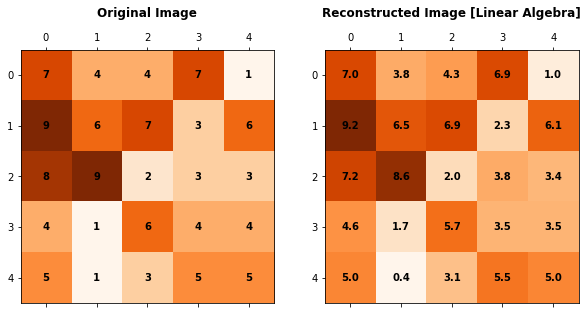

In [ ]:
plotMat(image,'Original Image',output_linear,'Reconstructed Image [Linear Algebra]')

# **Numarical Method**

In [ ]:
p2=p
p2[2]=np.delete(p2[2], [0,1,7,8])
p2[3]=np.delete(p2[3], [0,1,7,8])
p2

array([list([33, 21, 22, 22, 19]), list([19, 19, 25, 31, 23]),
       array([10, 16, 12, 27, 18]), array([10, 18, 24, 29, 12])],
      dtype=object)

In [ ]:
def dir4(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], cols[:k]
    elif k > 0:
        return rows[:-k], cols[k:]
    else:
        return rows, cols

def dir3(a, k):
    rows, cols = np.diag_indices_from(a)
    if k < 0:
        return rows[-k:], np.flip(cols[-k:])
    elif k > 0:
        return rows[:-k], np.flip(cols[:5-k])
    else:
        return rows, np.flip(cols)

In [ ]:
# Direction 3 Potitions
d3=[0,0,0,0,0]

# Direction 4 Potitions
d4=[0,0,0,0,0]

for i in range(5):
  r,c=dir3(image, i-2)
  val=[]
  for j in range(len(r)):
    temp=[r[j],c[j]]
    val.append(temp)
  d3[i]=val


for i in range(5):
  r,c=dir4(image, -(i-2))
  val=[]
  for j in range(len(r)):
    temp=[r[j],c[j]]
    val.append(temp)
  d4[i]=val

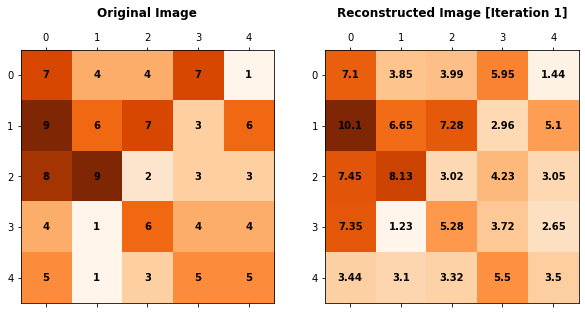

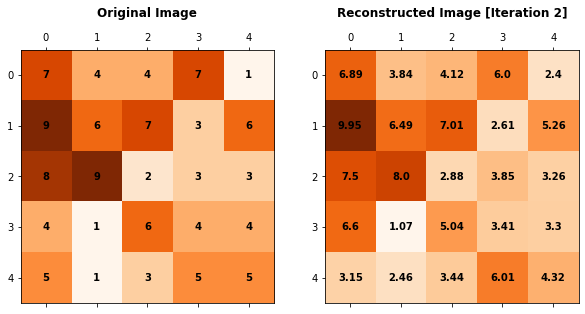

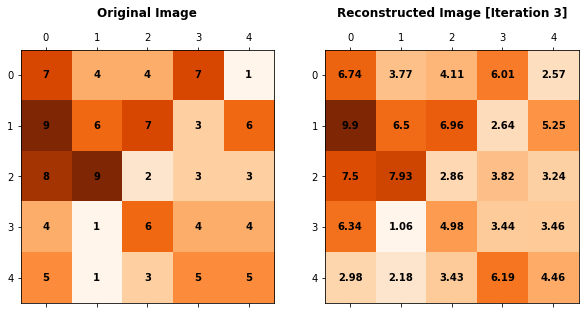

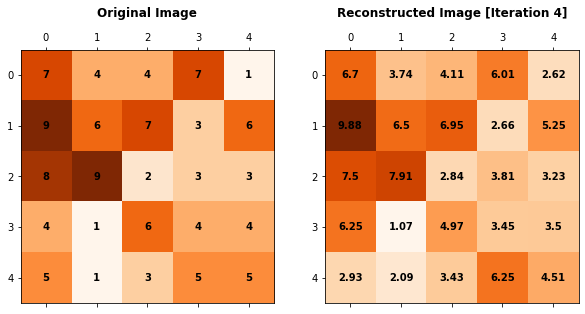

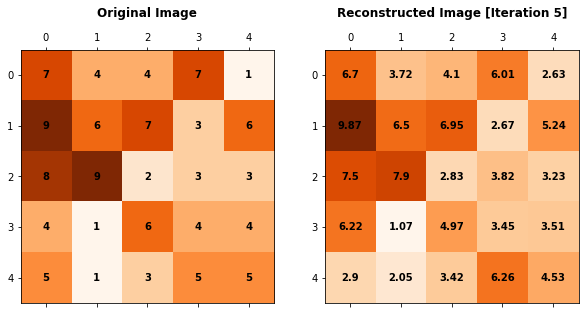

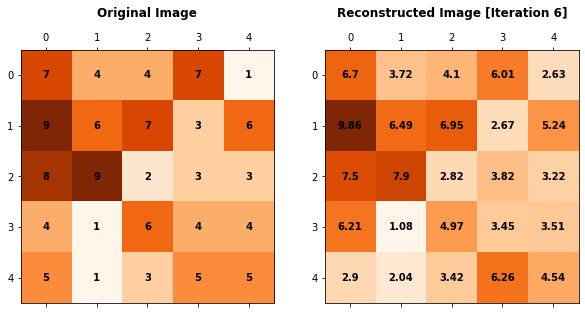

Solved in [ 1.7644340991973877 seconds ]


In [ ]:
start_time = time.time()

Z = np.zeros((5,5))
e = np.zeros((4,5))

for itt in range(6):

  # Projection 1
  for i in range(5):
    temp=Z[0][i]+Z[1][i]+Z[2][i]+Z[3][i]+Z[4][i]
    e[0][i]=p2[0][i]-temp
    for j in range(5):
      Z[j][i]=Z[j][i]+(e[0][i]/5)

  # Projection 2
  for i in range(5):
    temp=sum(Z[4-i])
    e[1][i]=p2[1][i]-temp
    for j in range(5):
      Z[4-i][j]=Z[4-i][j]+(e[1][i]/5)

  # Projection 3
  for i in range(5):
    temp=sum(Z[tuple(np.transpose(d3[i]))])
    e[2][i]=p2[2][i]-temp
    for j in d3[i]:
      Z[tuple(np.transpose(j))]=Z[tuple(np.transpose(j))]+(e[2][i]/(len(d3[i])))

  # Projection 4
  for i in range(5):
    temp=sum(Z[tuple(np.transpose(d4[i]))])
    e[3][i]=p2[3][i]-temp
    for j in d4[i]:
      Z[tuple(np.transpose(j))]=Z[tuple(np.transpose(j))]+(e[3][i]/(len(d4[i])))

  # Calculate Error Precentage
  e_presentage = np.zeros((4,5))
  for i in range(4):
    for j in range(5):
      e_presentage[i][j]=(abs(e[i][j])/p2[i][j])*100
  
  val=np.where(e_presentage > 1)[0]
  if (val.size == 0):
    print("All error values are less then 1% after interration =",itt)
    break
  else:
    plotMat(image,'Original Image',Z,'Reconstructed Image [Iteration '+str(itt+1)+']')

print("Solved in [ %s seconds ]" % (time.time() - start_time))